<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/IND_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze state wise corona impact

To analyze growth of victims in corona if Lockdown was not implemented

In [0]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Kaggle API 1.5.4


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: IndividualDetails.csv   
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
import plotly.graph_objects as go


In [0]:
data = pd.read_csv('covid_19_india.csv')

In [0]:
data.shape

(500, 9)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Sno                         500 non-null int64
Date                        500 non-null object
Time                        500 non-null object
State/UnionTerritory        500 non-null object
ConfirmedIndianNational     500 non-null object
ConfirmedForeignNational    500 non-null object
Cured                       500 non-null int64
Deaths                      500 non-null int64
Confirmed                   500 non-null int64
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


In [0]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
data.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
data = data.drop(['Sno', 'Time'], axis = 'columns')

In [29]:
data.head(10)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases
0,30/01/20,Kerala,1,0,0,0,1,10
1,31/01/20,Kerala,1,0,0,0,1,10
2,01/02/20,Kerala,2,0,0,0,2,20
3,02/02/20,Kerala,3,0,0,0,3,30
4,03/02/20,Kerala,3,0,0,0,3,30
5,04/02/20,Kerala,3,0,0,0,3,30
6,05/02/20,Kerala,3,0,0,0,3,30
7,06/02/20,Kerala,3,0,0,0,3,30
8,07/02/20,Kerala,3,0,0,0,3,30
9,08/02/20,Kerala,3,0,0,0,3,30


In [0]:
data['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Pondicherry', 'West Bengal', 'Chattisgarh',
       'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Puducherry',
       'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur',
       'Mizoram', 'Andaman and Nicobar Islands', 'Goa'], dtype=object)

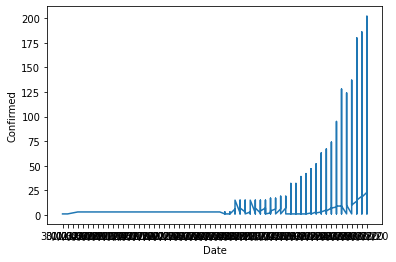

In [0]:
plt.plot(data["Date"], data['Confirmed'], scalex = True)
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.show()

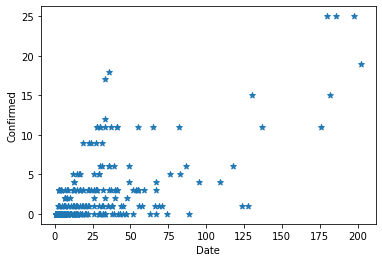

In [0]:
plt.scatter(data["Confirmed"], data['Cured'], marker= '*')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.show()

In [39]:
data['Total Cases'] = data['ConfirmedIndianNational'] + data['ConfirmedForeignNational']
data.head(100)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases
0,30/01/20,Kerala,1,0,0,0,1,10
1,31/01/20,Kerala,1,0,0,0,1,10
2,01/02/20,Kerala,2,0,0,0,2,20
3,02/02/20,Kerala,3,0,0,0,3,30
4,03/02/20,Kerala,3,0,0,0,3,30
...,...,...,...,...,...,...,...,...
95,10/03/20,Telengana,1,0,0,0,1,10
96,10/03/20,Jammu and Kashmir,1,0,0,0,1,10
97,11/03/20,Maharashtra,2,0,0,0,2,20
98,11/03/20,Delhi,5,0,0,0,5,50


In [41]:
df1= data[data['Date']=='28/03/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(
    title='Till 27th March Total Cases in India')
fig.show()

In [0]:
df_ICMR = pd.read_csv('ICMRTestingDetails.csv')

In [49]:
#Testing till 25 March
df_ICMR ['DateTime'] =pd.to_datetime(df_ICMR .DateTime,dayfirst=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))
fig.update_layout(title_text='ICMR TEST for COVID-19',plot_bgcolor='rgb(225,230,255)')
fig.show()